In [154]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
import clustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt

In [191]:
data = loadarff('datasets/3MC.arff')
table = pd.DataFrame(data[0])

In [106]:
table

,x,y,class
0,-3.053,0.787,b'1'
1,-2.535,1.088,b'1'
2,-2.667,0.611,b'1'
3,-2.598,1.323,b'1'
4,2.173,0.864,b'1'
...,...,...,...
395,-3.295,11.699,b'3'
396,-1.681,11.672,b'3'
397,-2.807,11.867,b'3'
398,-3.830,11.195,b'3'


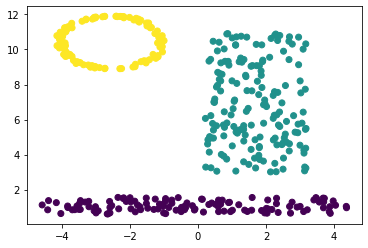

In [155]:
plt.scatter(table['x'], table['y'], c=table['class'])

In [23]:
from importlib import reload

In [205]:
reload(clustering)
import clustering

In [192]:
y = table['class']
X = table.drop(['class'], axis=1)

In [193]:
enc = LabelEncoder()
y = enc.fit_transform(y)

In [194]:
np.unique(y)

array([0, 1, 2])

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.predict(X)

In [195]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [214]:
adjusted_rand_score(result, y)

0.9467287563252391

In [199]:
np.unique(result)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

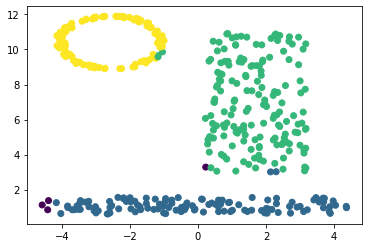

In [213]:
plt.scatter(table['x'], table['y'], c=result)

In [212]:
nbc = clustering.NBC(k=35)
result = nbc.fit(X)
print(result)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  2  2

In [171]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [172]:
X

,x,y
0,-1.251715,-1.337948
1,-1.032810,-1.262239
2,-1.088593,-1.382216
3,-1.059433,-1.203132
4,0.956776,-1.318581
...,...,...
395,-1.353984,1.406669
396,-0.671912,1.399878
397,-1.147756,1.448925
398,-1.580073,1.279901


In [134]:
r = X.min().to_numpy()

In [127]:
r = np.zeros(len(X.columns))

In [181]:
reload(clustering)
import clustering

In [136]:
def mad_standarization(column):
    mean = column.mean()
    mad = column.mad()
    return (column - mean) / mad

In [139]:
X_copy = X.copy()

In [140]:
X_standarized = X_copy.apply(mad_standarization)

In [142]:
X_standarized

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO
0,0.193754,0.610913,0.067829,0.323739,2.001410,0.631703,-0.241267,0.160371,-0.264172,0.915602,-0.478003,-0.404449,0.351384,-0.457367,-0.094701,0.464892,-0.386263,0.223957
1,-0.392707,-0.751733,0.142256,-0.998504,-0.911527,0.190762,-0.699865,0.611613,-0.717497,-0.416040,-0.705168,-0.729807,-0.631330,-0.085852,0.658748,0.191483,0.013466,0.551472
2,1.513290,1.000240,1.779656,1.431564,0.836236,0.631703,1.346189,-1.343770,1.095804,0.832374,1.301452,1.295381,1.712065,0.099905,1.914496,-0.492039,-0.186399,0.060199
3,-0.099476,-0.751733,-0.006598,-0.355251,0.253648,0.190762,-0.876249,0.762027,-0.717497,-0.416040,-1.083775,-0.869246,-1.803027,-1.757669,-0.094701,-0.355335,2.012112,1.861533
4,-1.272398,-0.167742,-0.899725,1.288619,8.021480,19.151224,-0.699865,0.611613,-0.717497,-0.332812,1.982945,-0.763007,0.502571,10.130807,0.658748,-0.218630,-1.785316,-2.068649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.099476,-1.141060,0.365538,0.502420,0.447844,-0.250179,0.005671,-0.140458,-0.264172,-1.165088,0.430655,-0.118931,-0.971500,-0.085852,0.156449,1.695232,-0.186399,-0.103558
842,-0.685937,0.221585,0.142256,-0.212306,0.836236,1.072644,-0.347097,0.310785,-0.264172,0.915602,-0.591585,-0.477489,0.049011,-0.085852,-1.350448,1.011710,-0.586128,0.223957
843,1.806521,1.778895,1.407520,1.896136,1.030431,1.513585,1.875341,-1.644599,2.002454,2.080789,1.490756,1.866418,0.956131,-0.457367,-0.848149,-1.175562,-0.386263,0.878987
844,-1.125783,-1.725051,-0.304307,-0.819823,-0.717331,-0.691120,-1.193740,1.363683,-1.170822,-1.997364,-1.273079,-1.128205,-1.009297,-1.200397,-1.601598,1.695232,0.213331,-0.103558


In [143]:
nbc = clustering.NBC(k=3)
nbc.fit(X_standarized, r)

[[1, COMPACTNESS                 -2.152089
CIRCULARITY                 -1.335724
DISTANCE CIRCULARITY        -2.016134
RADIUS RATIO                -1.748967
PR.AXIS ASPECT RATIO        -1.299918
MAX.LENGTH ASPECT RATIO     -1.573002
SCATTER RATIO               -0.946802
ELONGATEDNESS                1.062855
PR.AXIS RECTANGULARITY      -0.717497
MAX.LENGTH RECTANGULARITY   -1.664454
SCALED VARIANCE_MAJOR       -1.348800
SCALED VARIANCE_MINOR       -0.962206
SCALED RADIUS OF GYRATION   -1.122687
SKEWNESS ABOUT_MAJOR         1.585965
SKEWNESS ABOUT_MINOR        -0.597000
KURTOSIS ABOUT_MAJOR        -1.448970
KURTOSIS ABOUT_MINOR        -1.785316
HOLLOWS RATIO               -2.068649
distance_with_r              4.969467
Name: 809, dtype: float64, 1.5494202894614486], [2, COMPACTNESS                 -2.005474
CIRCULARITY                 -1.141060
DISTANCE CIRCULARITY        -1.643998
RADIUS RATIO                -1.677494
PR.AXIS ASPECT RATIO        -1.105722
MAX.LENGTH ASPECT RATIO     -1.

KeyboardInterrupt: 

In [18]:
for t in X.iterrows():
    sample = t
    break

(0, COMPACTNESS                   95.0
CIRCULARITY                   48.0
DISTANCE CIRCULARITY          83.0
RADIUS RATIO                 178.0
PR.AXIS ASPECT RATIO          72.0
MAX.LENGTH ASPECT RATIO       10.0
SCATTER RATIO                162.0
ELONGATEDNESS                 42.0
PR.AXIS RECTANGULARITY        20.0
MAX.LENGTH RECTANGULARITY    159.0
SCALED VARIANCE_MAJOR        176.0
SCALED VARIANCE_MINOR        379.0
SCALED RADIUS OF GYRATION    184.0
SKEWNESS ABOUT_MAJOR          70.0
SKEWNESS ABOUT_MINOR           6.0
KURTOSIS ABOUT_MAJOR          16.0
KURTOSIS ABOUT_MINOR         187.0
HOLLOWS RATIO                197.0
Name: 0, dtype: float64)


In [18]:
for i in sample[1]:
    print(i, type(i))

95.0 <class 'float'>
48.0 <class 'float'>
83.0 <class 'float'>
178.0 <class 'float'>
72.0 <class 'float'>
10.0 <class 'float'>
162.0 <class 'float'>
42.0 <class 'float'>
20.0 <class 'float'>
159.0 <class 'float'>
176.0 <class 'float'>
379.0 <class 'float'>
184.0 <class 'float'>
70.0 <class 'float'>
6.0 <class 'float'>
16.0 <class 'float'>
187.0 <class 'float'>
197.0 <class 'float'>


In [35]:
def distance(p: pd.Series, q: pd.Series, l: int = 2):
        return np.power(np.sum([np.abs(i-j)**l for i, j in zip(p, q)]), 1/l)

In [40]:
distance(X.loc[0], X.loc[1], l=7)

50.00402123086807

In [5]:
table['distance'] = 0

In [44]:
table

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO,Class,distance
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,b'van',0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,b'van',0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,b'saab',0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,b'van',0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,b'bus',0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0,b'saab',0
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0,b'van',0
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0,b'saab',0
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0,b'saab',0


In [54]:
table.at[1, 'distance'] = 10

In [16]:
table

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO,Class,distance
73,73.0,37.0,53.0,111.0,54.0,6.0,126.0,55.0,18.0,128.0,135.0,227.0,147.0,82.0,1.0,15.0,176.0,184.0,b'opel',0
515,76.0,38.0,58.0,125.0,58.0,5.0,133.0,51.0,18.0,127.0,152.0,259.0,145.0,87.0,0.0,21.0,177.0,184.0,b'opel',0
61,77.0,38.0,63.0,135.0,59.0,5.0,130.0,52.0,18.0,130.0,145.0,247.0,139.0,79.0,13.0,21.0,183.0,187.0,b'opel',0
112,77.0,38.0,75.0,144.0,59.0,6.0,147.0,46.0,19.0,132.0,167.0,315.0,136.0,80.0,16.0,20.0,181.0,187.0,b'opel',0
411,78.0,36.0,51.0,116.0,56.0,4.0,120.0,57.0,17.0,124.0,135.0,209.0,135.0,84.0,1.0,12.0,177.0,184.0,b'opel',0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,115.0,53.0,100.0,205.0,64.0,11.0,220.0,30.0,25.0,166.0,229.0,710.0,214.0,71.0,21.0,11.0,189.0,199.0,b'saab',0
788,115.0,52.0,100.0,203.0,62.0,10.0,217.0,31.0,24.0,165.0,229.0,697.0,214.0,72.0,14.0,4.0,188.0,197.0,b'saab',0
283,116.0,53.0,110.0,231.0,67.0,12.0,217.0,31.0,24.0,165.0,231.0,692.0,222.0,67.0,16.0,28.0,192.0,206.0,b'saab',0
346,117.0,52.0,110.0,228.0,65.0,12.0,212.0,31.0,24.0,163.0,228.0,668.0,220.0,66.0,21.0,25.0,194.0,205.0,b'saab',0


In [13]:
table = table.sort_values('COMPACTNESS')

In [34]:
list(range(0, 3))

[0, 1, 2]

In [35]:
n = len(table.index)
for i in range(n):
    left_index = max(0, i - 3)
    right_index = min(n, i + 4)

    target_value = X.iloc[i]['COMPACTNESS']
    indexed_values = [(X.iloc[j].name, X.iloc[j]) for j in range(left_index, right_index) if j != i]
    sorted_indexes = sorted(indexed_values, key=lambda x: np.abs(x[1]['COMPACTNESS'] - target_value))
    print(sorted_indexes)
    candidates = sorted_indexes[:3]
    eps = max(candidates, key=lambda x: x[1]['COMPACTNESS'])
    break

[(3, COMPACTNESS                   93.0
CIRCULARITY                   41.0
DISTANCE CIRCULARITY          82.0
RADIUS RATIO                 159.0
PR.AXIS ASPECT RATIO          63.0
MAX.LENGTH ASPECT RATIO        9.0
SCATTER RATIO                144.0
ELONGATEDNESS                 46.0
PR.AXIS RECTANGULARITY        19.0
MAX.LENGTH RECTANGULARITY    143.0
SCALED VARIANCE_MAJOR        160.0
SCALED VARIANCE_MINOR        309.0
SCALED RADIUS OF GYRATION    127.0
SKEWNESS ABOUT_MAJOR          63.0
SKEWNESS ABOUT_MINOR           6.0
KURTOSIS ABOUT_MAJOR          10.0
KURTOSIS ABOUT_MINOR         199.0
HOLLOWS RATIO                207.0
Name: 3, dtype: float64), (1, COMPACTNESS                   91.0
CIRCULARITY                   41.0
DISTANCE CIRCULARITY          84.0
RADIUS RATIO                 141.0
PR.AXIS ASPECT RATIO          57.0
MAX.LENGTH ASPECT RATIO        9.0
SCATTER RATIO                149.0
ELONGATEDNESS                 45.0
PR.AXIS RECTANGULARITY        19.0
MAX.LENGTH RECTANGUL

In [6]:
sorted_array = np.array([1, 2, 4, 8, 10])

In [68]:
index_closest = np.searchsorted(sorted_array, 8)

In [69]:
index_closest

3

In [7]:
k = 3

In [9]:
np.abs(sorted_array - 8)

array([7, 6, 4, 0, 2])

In [10]:
np.argsort(np.abs(sorted_array - 8))

array([3, 4, 2, 1, 0], dtype=int64)

In [11]:
closest_indexes = sorted_array[np.argsort(np.abs(sorted_array - 8))[1:k+1]]
print("K najbliższych indeksów:", closest_indexes)

K najbliższych indeksów: [10  4  2]


In [77]:
cache = {}

cache[(1,2)] = 5
cache[(5,2)] = 10

cache[(1,2)]

5